# CS4372: Assignment 1
## + Subject: Create a full analysis and model prediction for Melbourne House Prices
## Partners:
### - Abdel Homi
### - Kaushik Pasikanti

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\delho\Desktop\UTD-Fall2021\CS-4372-Computational Methods for Data Scientists\Assignments\data\MELBOURNE_HOUSE_PRICES_LESS.csv\MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [6]:
np.sum(df.isnull())

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

### Analysis: we can see that we have 14590 missing values from the Price feature.


In [7]:
df['Rooms'].value_counts()

3     27950
4     15747
2     13248
5      3434
1      2111
6       424
7        61
8        29
10        7
9         5
12        4
11        1
16        1
31        1
Name: Rooms, dtype: int64

# Plots and data distribution
*Numerical variables with histograms,
Categorical variables with count plots,
Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.*

In [8]:
def features_cat_value_count(feature):
    price_val_count = df.loc[:, feature].value_counts()
    price_val_count_list = list(zip(price_val_count,price_val_count.index))
    count_val = price_val_count_list[:10]
    
    x_val = np.array([x[0] for x in count_val])
    y_val = np.array([x[1] for x in count_val])

    # print(x_val.max)
    plt.bar(x_val.flatten(),y_val, width=5.5,color='lightblue' ,align='center', edgecolor='navy')
    plt.plot(x_val.flatten(),y_val, color='red')
    plt.hlines(x_val.flatten(),xmin=x_val.min(), xmax=x_val.max())
    plt.title(r"Number of Houses sold by per house value",y=1, x=.65, color='navy')
    plt.xlabel('#of Houses bought')
    plt.ylabel('House prices (1e6)')
    return plt.show()


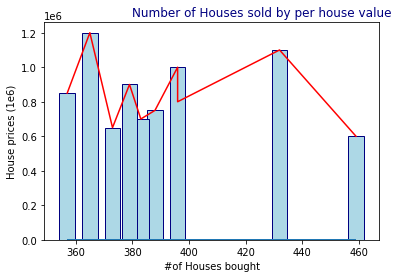

In [9]:
features_cat_value_count('Price')

Text(0, 0.5, 'Frequency')

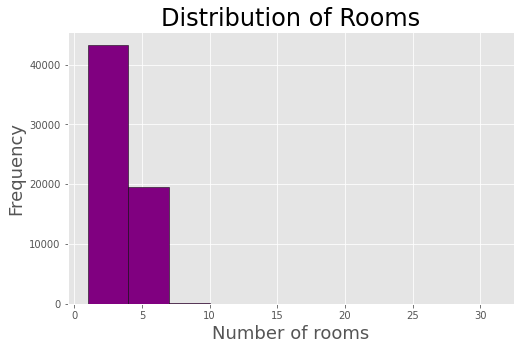

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the Number of rooms
df['Rooms'].plot(kind='hist', color='purple', edgecolor='black', figsize=(8,5))
plt.title('Distribution of Rooms', size=24)
plt.xlabel('Number of rooms', size=18)
plt.ylabel('Frequency', size=18)


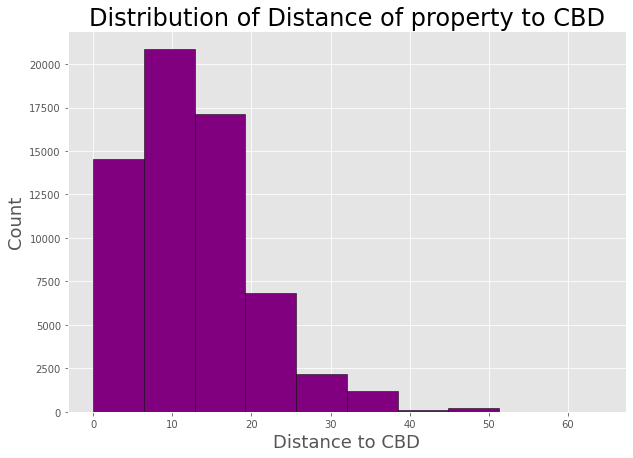

In [11]:
# histogram of the Distance to CBD
df['Distance'].plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Distance of property to CBD', size=24)
plt.xlabel('Distance to CBD', size=18)
plt.ylabel('Count', size=18);

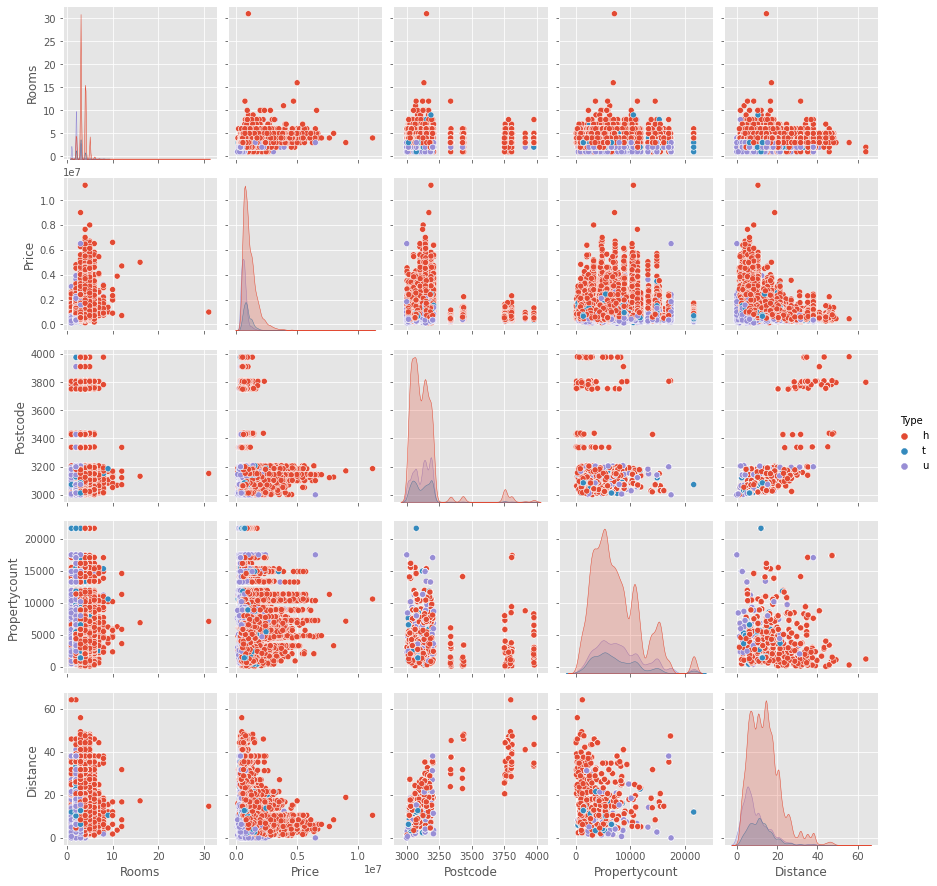

In [12]:
#Feature correlation plot per House type
sns.pairplot(df, hue ='Type')

<AxesSubplot:xlabel='Distance', ylabel='Price'>

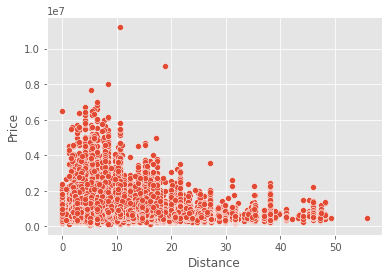

In [13]:
#plotting distance against price
sns.scatterplot(x = df['Distance'], y = df['Price'])


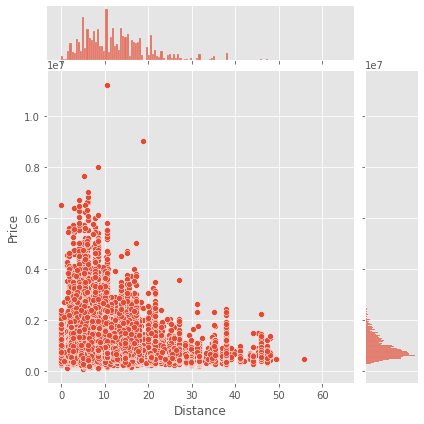

In [14]:
#plotting distance against price with a joint plot
sns.jointplot(x = df['Distance'], y = df['Price'])

<AxesSubplot:xlabel='Propertycount', ylabel='Price'>

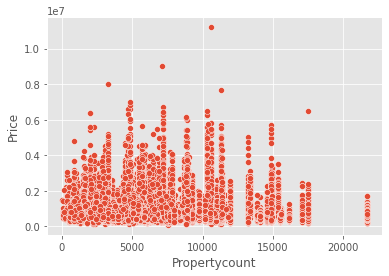

In [15]:
#plotting distance against price
sns.scatterplot(x= df['Propertycount'], y= df['Price'])

### -Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

<AxesSubplot:>

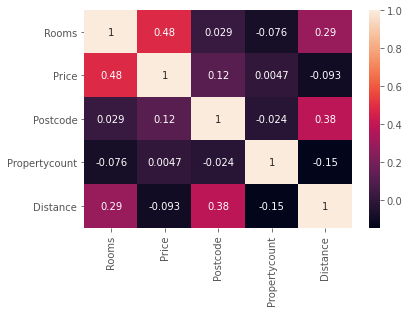

In [16]:
#checking the correlations filtering only the houses sold
import seaborn as sns
sns.heatmap(df[df['Type']=='u'].corr(), annot = True)

In [17]:
#Lets subset the data for distance <5 and distance >=5 \
# and look at features such as propertyCount, price
df_close_dist = df[df['Distance'] < 5]
df_far_dist = df[df['Distance'] >= 5]

In [18]:
df_close_dist['Distance'].value_counts(bins = True) #Not too sure what this represents

(-0.0056, 4.6]    7233
Name: Distance, dtype: int64

In [19]:
df_far_dist['Distance'].value_counts(bins = True) #Not too sure what this represents

(4.9399999999999995, 64.1]    55790
Name: Distance, dtype: int64

### As we can see here, the mean price varies drastically between each respective subsetted dataset. The rooms is also higher for the close distance which also makes sense. 

# Data preprocessing

In [20]:
df['Price'] = df["Price"].fillna(830000)

In [21]:
#Getting rid of outliers in the price column
import seaborn as sns
import matplotlib.pyplot as plt
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR


In [22]:
df_price_outliers_lower = df[(df['Price'] < Lower_Whisker)]
df_price_outliers_upper = df[(df['Price'] > Upper_Whisker)]

In [23]:
df_price_outliers = pd.concat([df_price_outliers_lower, df_price_outliers_upper])

C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

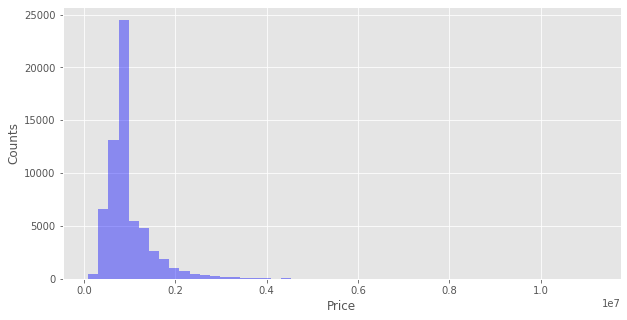

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df['Price'], hist=True, kde = False, color = 'blue')
plt.ylabel('Counts')

In [25]:
#Get rid of outliers as  Propertycount
import seaborn as sns
import matplotlib.pyplot as plt
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR


In [26]:
df_Dist_outliers_lower = df[(df['Distance'] < Lower_Whisker)]
df_Dist_outliers_upper = df[(df['Distance'] > Upper_Whisker)]
df_Dist_outliers = pd.concat([df_Dist_outliers_lower, df_Dist_outliers_upper])

C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

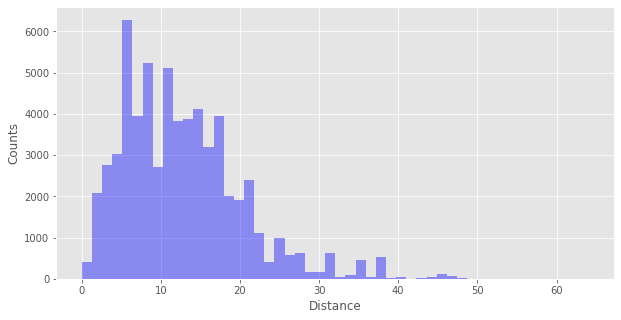

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['Distance'], hist = True, kde = False, color = 'blue')
plt.ylabel('Counts')

In [28]:
#Get rid of outliers as  Rooms
import seaborn as sns
import matplotlib.pyplot as plt
Q1 = df['Rooms'].quantile(0.25)
Q3 = df['Rooms'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR


In [29]:
df_Rooms_outliers_lower = df[(df['Rooms'] < Lower_Whisker)]
df_Rooms_outliers_upper = df[(df['Rooms'] > Upper_Whisker)]
df_Rooms_outliers = pd.concat([df_Rooms_outliers_lower, df_Rooms_outliers_upper])

In [30]:
#Get rid of outliers as  Propertycount
import seaborn as sns
import matplotlib.pyplot as plt
Q1 = df['Propertycount'].quantile(0.25)
Q3 = df['Propertycount'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR


In [31]:
df_prop_outliers_lower = df[(df['Propertycount'] < Lower_Whisker)]
df_prop_outliers_upper = df[(df['Propertycount'] > Upper_Whisker)]
df_prop_outliers = pd.concat([df_prop_outliers_lower, df_prop_outliers_upper])

In [32]:
#concatening all the outliers and then dropping them 
df_all_outliers = pd.concat([df_prop_outliers, df_price_outliers, df_Rooms_outliers, df_Dist_outliers])
df.drop(df_all_outliers, axis = 1)

""
0
1
2
3
4
...
63018
63019
63020
63021


# Preprocessing Dates

### Using Resampleing method to aggregate my Month and year

we can see see the total number of transactions by month, week, day had the highest number of transactions.

In [33]:
#Checking for data duplication and dropping them from the main dataset
dup_values = df[df.duplicated()]
df_no_dups = df[~df.duplicated()]

In [34]:
#convert to datetime
df['Date']= pd.to_datetime(df['Date'])


In [35]:
df['weekday'] = df['Date'].dt.dayofweek
#converts to day of the week with monday being zero

<AxesSubplot:>

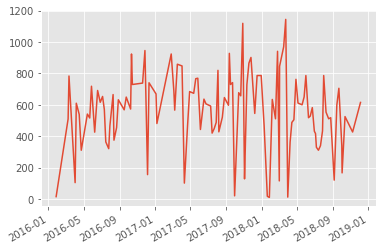

In [36]:
#This will help us visualize which dates are the most common(Which dates had the most number of transactions)
df['Date'].value_counts().sort_values().plot.line()


<AxesSubplot:>

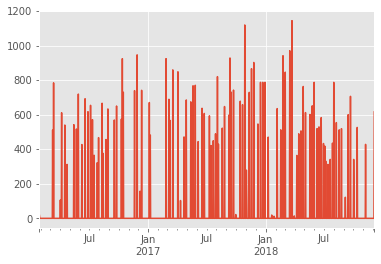

In [37]:
df['Date'].value_counts().resample('D').sum().plot.line()

In [38]:
#highest number of transactions in one day
max(df['Date'].value_counts().resample('D').sum())

1144

<AxesSubplot:>

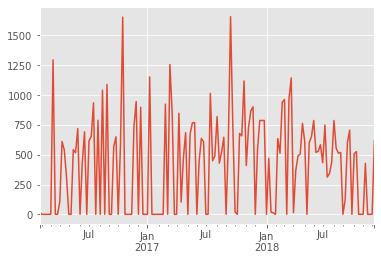

In [39]:
df['Date'].value_counts().resample('W').sum().plot.line()


<AxesSubplot:>

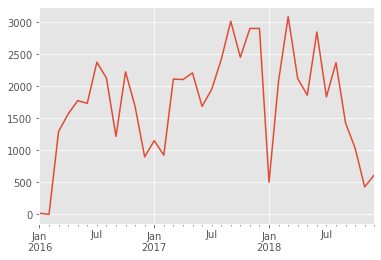

In [40]:
df['Date'].value_counts().resample('M').sum().plot.line()

<AxesSubplot:>

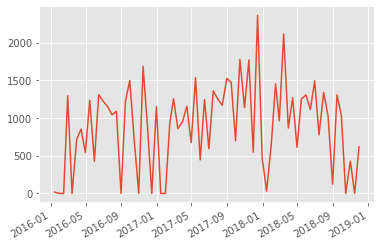

In [41]:
df['Date'].value_counts().resample('SM').sum().plot.line()

In [42]:
df_no_dups['Date']= pd.to_datetime(df_no_dups['Date'],dayfirst=True)

<ipython-input-42-4f53768c244e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['Date']= pd.to_datetime(df_no_dups['Date'],dayfirst=True)


In [43]:
# Grouping Housing Type features by Date
var = df_no_dups[df_no_dups['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').std()
count = df_no_dups[df_no_dups['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').count()
mean = df_no_dups[df_no_dups['Type']=='h'].sort_values('Date',ascending=False).groupby('Date').mean()

In [44]:
print('Type of houses sold by Date')
print("Housing Type- VAR: ", var)
print("Housing Type- Count: ", count)
print("Housing Type- mean: ", mean)

Type of houses sold by Date
Housing Type- VAR:                 Rooms          Price    Postcode  Propertycount  Distance
Date                                                                    
2016-01-28  0.845154  266960.350186   40.557191    5758.727569  4.732180
2016-02-04  0.673691  319134.173286  208.852166    4183.621605  8.814052
2016-04-16  0.901810  512913.788423  114.786005    4370.635368  6.936830
2016-04-23  0.809844  427378.660020  122.556037    4502.357899  7.697222
2016-05-07  0.881306  519109.955602  125.711682    4190.279740  7.086031
...              ...            ...         ...            ...       ...
2018-09-08  0.819770  607253.749239  124.077671    4346.435667  7.246632
2018-09-15  0.847896  516677.731331  149.258318    4171.149901  7.788203
2018-09-22  0.804576  556054.267748  139.180502    4509.064127  7.534092
2018-10-06  0.811517  382681.812374  168.932569    4791.767285  7.820163
2018-10-13  0.914866  393539.059755  155.637746    4631.883588  7.968550

[1

### - We notice here that only the price column has null values. There are multiple ways that we can handle this. We can use the mean, median, mode. In my case I will be using the mode to fill in those null values in the price column.

In [45]:
df['Price'] = df["Price"].fillna(830000)

In [46]:
#Explore Region Name against other variables
#Group all the features by Regionname for the houses of type h and Distance less than 14 kms from CBD.
feature_region_mean= df_no_dups[(df_no_dups['Type']=='h')&(df_no_dups['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby('Regionname').mean()
feature_region_std= df_no_dups[(df_no_dups['Type']=='h')&(df_no_dups['Distance']<14)].sort_values('Date',ascending=False).dropna().groupby('Regionname').std()

<AxesSubplot:xlabel='Regionname'>

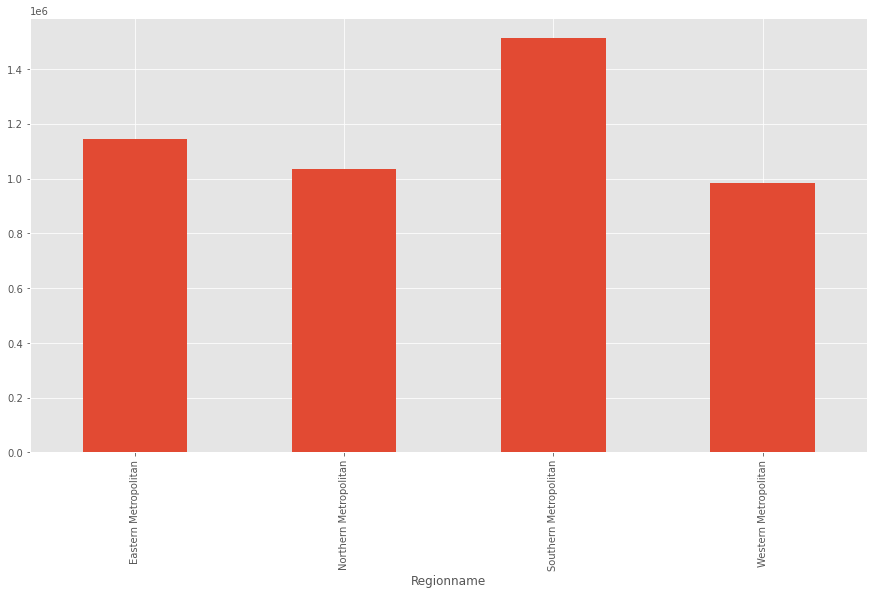

In [47]:
# Plotting the avregae price of house sold by Regionname
feature_region_mean['Price'].plot(kind='bar',figsize =(15,8))

<AxesSubplot:xlabel='Regionname'>

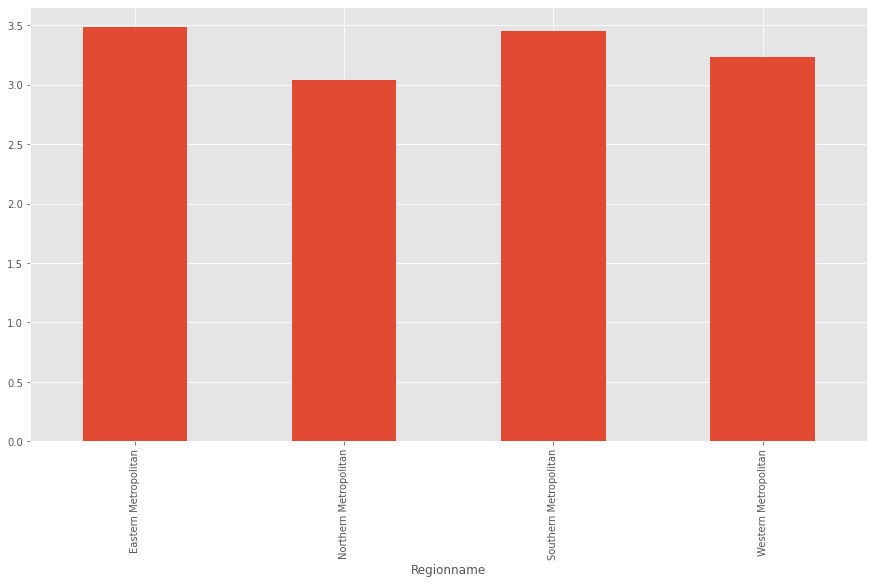

In [48]:
feature_region_mean['Rooms'].plot(kind='bar',figsize =(15,8))

<AxesSubplot:xlabel='Regionname'>

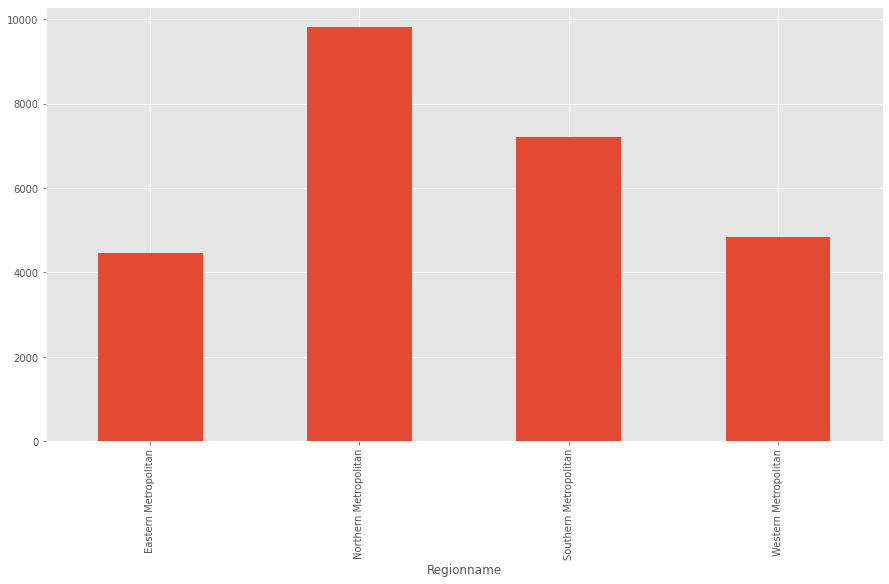

In [49]:
feature_region_mean['Propertycount'].plot(kind='bar',figsize =(15,8))

In [50]:
# Looking at the average price range in suburb for houses sold in Southern Metropolitan
feature_SouthernM = df_no_dups[(df_no_dups['Regionname']=='Southern Metropolitan')& 
                               (df_no_dups['Type']=='h') & 
                                (df_no_dups['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').mean()

In [51]:
#Analyzing Average no. of rooms and Distance for each of the Suburb in Southern Metropolitan Region
feature_South_Suburb = df_no_dups[(df_no_dups['Regionname']=='Southern Metropolitan')& 
                               (df_no_dups['Type']=='h') & 
                                (df_no_dups['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [52]:
#Analyzing Average no. of rooms and Distance for each of the Suburb in Western Metropolitan Region
feature_West_Suburb = df_no_dups[(df_no_dups['Regionname']=='Western Metropolitan')& 
                               (df_no_dups['Type']=='h') & 
                                (df_no_dups['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

<AxesSubplot:xlabel='Suburb'>

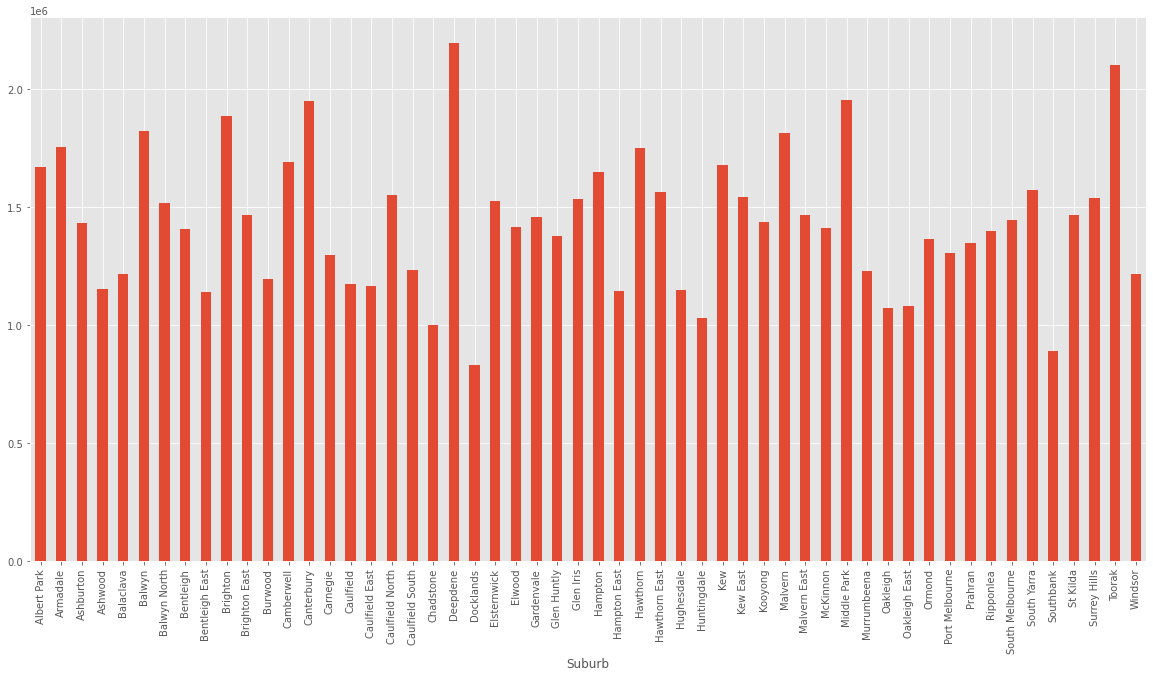

In [53]:
feature_SouthernM['Price'].plot(kind='bar',figsize=(20,10))


C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

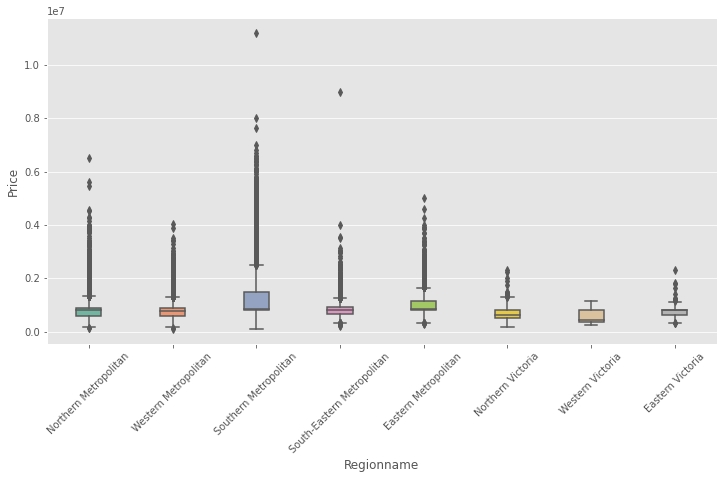

In [54]:
#Plotting the region name and price
plt.figure(figsize=(12,6))
sns.boxplot('Regionname', 'Price', data=df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
df['Regionname'].value_counts()

C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Boroondara City Council           5132
Darebin City Council              4182
Banyule City Council              3656
Monash City Council               3592
Bayside City Council              3331
Brimbank City Council             3296
Moreland City Council             3030
Hume City Council                 2939
Glen Eira City Council            2934
Melbourne City Council            2728
Whittlesea City Council           2545
Moonee Valley City Council        2512
Kingston City Council             2378
Manningham City Council           2225
Maribyrnong City Council          2083
Stonnington City Council          1991
Whitehorse City Council           1811
Port Phillip City Council         1771
Yarra City Council                1698
Wyndham City Council              1542
Maroondah City Council            1451
Hobsons Bay City Council          1351
Knox City Council                 1043
Greater Dandenong City Council     948
Frankston City Council             835
Melton City Council      

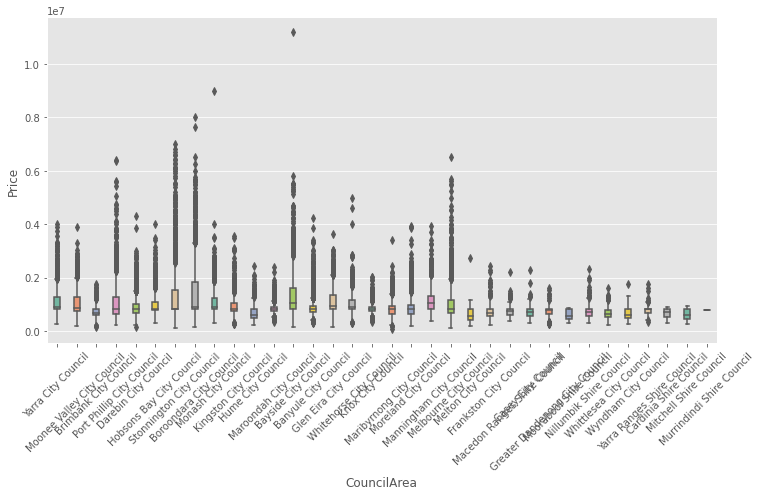

In [55]:
#Plotting the CouncilArea and price
plt.figure(figsize=(12,6))
sns.boxplot('CouncilArea', 'Price', data=df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
df['CouncilArea'].value_counts()

C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


h    45053
u    11655
t     6315
Name: Type, dtype: int64

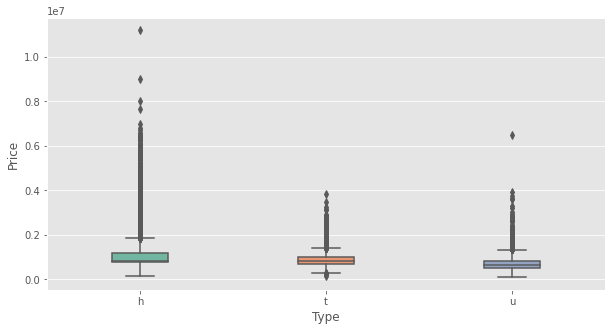

In [56]:
#Type and price
plt.figure(figsize=(10,5))
sns.boxplot('Type', 'Price', data=df, width=0.3, palette="Set2")
df['Type'].value_counts()

C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Reservoir           1241
Bentleigh East       845
Mount Waverley       831
Richmond             822
Glen Waverley        819
                    ... 
Castella               1
Warneet                1
Pentland Hills         1
Belgrave Heights       1
Yarrambat              1
Name: Suburb, Length: 380, dtype: int64

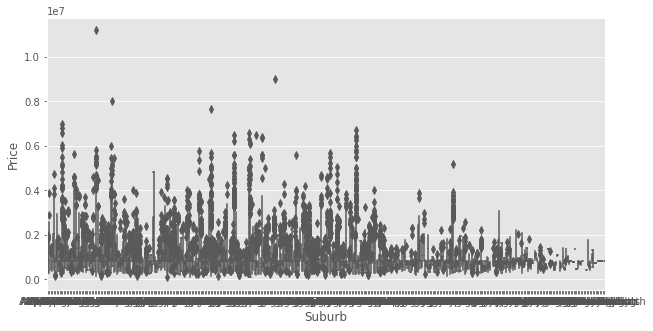

In [57]:
#Suburb vs price
plt.figure(figsize=(10,5))
sns.boxplot('Suburb', 'Price', data=df, width=0.3, palette="Set2")
df['Suburb'].value_counts()

# Label Enconding using dummies variable

### Dropping values with no correlation into the data population

In [58]:
df_dummies = pd.get_dummies(df[['Type','Method','CouncilArea','Regionname']])

In [59]:
#Dropping the old columns which have been converted to dummies and creating a new dataframe
df.drop(['Suburb','Type','Method','CouncilArea','Regionname'],axis=1,inplace=True)
df=df.join(df_dummies)

In [60]:
df.head(5)

,Address,Rooms,Price,SellerG,Date,Postcode,Propertycount,Distance,weekday,Type_h,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,49 Lithgow St,3,1490000.0,Jellis,2017-01-04,3067,4019,3.0,2,1,...,1,0,0,0,1,0,0,0,0,0
1,59A Turner St,3,1220000.0,Marshall,2017-01-04,3067,4019,3.0,2,1,...,1,0,0,0,1,0,0,0,0,0
2,119B Yarra St,3,1420000.0,Nelson,2017-01-04,3067,4019,3.0,2,1,...,1,0,0,0,1,0,0,0,0,0
3,68 Vida St,3,1515000.0,Barry,2017-01-04,3040,1543,7.5,2,1,...,0,0,0,0,0,0,0,0,1,0
4,92 Clydesdale Rd,2,670000.0,Nelson,2017-01-04,3042,3464,10.4,2,1,...,0,0,0,0,0,0,0,0,1,0


# Machine Learning: Preprocessing 
### -- Split data to train/test subdata
### -- Data encoding using MinMaxScaler

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler




In [62]:
scaler = MinMaxScaler()

# Machine Learning: Training Model

In [63]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
X = df.loc[:, ['Rooms', 'Price' , 'Propertycount', 'Distance']]
y = df[['Price']]

In [64]:
X

,Rooms,Price,Propertycount,Distance
0,3,1490000.0,4019,3.0
1,3,1220000.0,4019,3.0
2,3,1420000.0,4019,3.0
3,3,1515000.0,1543,7.5
4,2,670000.0,3464,10.4
...,...,...,...,...
63018,3,566000.0,5833,20.6
63019,3,500000.0,5833,20.6
63020,3,545000.0,5833,20.6
63021,3,830000.0,7955,15.3


In [65]:
X.shape

(63023, 4)

In [66]:
y

,Price
0,1490000.0
1,1220000.0
2,1420000.0
3,1515000.0
4,670000.0
...,...
63018,566000.0
63019,500000.0
63020,545000.0
63021,830000.0


In [67]:
y.shape

(63023, 1)

In [68]:
# Feature Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import numpy as np

sc = StandardScaler()

# # We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
# model = lr_classifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Predicting the Test set results
# y_pred = model.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'sag']
space['penalty'] = ['l2']
# space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(lr_classifier, space, n_iter=12, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\delho\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
y_pred = model.predict(X_test)
np.mean(y_test.values == y_pred)

In [ ]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.title("")

In [ ]:
# # Visualising the Training set results
# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [ ]:
# scaler = preprocessing.StandardScaler().fit(X)
# X_train_transformed = scaler.transform(y)

In [ ]:
print(lm.summary())

### Model analysis: Standardize test data for enhanced predictions

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Rooms', 'Price', 'Propertycount', 'Distance']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_train_price = lm.predict(X_train_rfe)


In [ ]:
res = (y_train_price - y_train)


In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
#checking the correlations filtering only the houses sold
import seaborn as sns
sns.heatmap(df[df['Type']=='u'].corr(), annot = True)

In [ ]:
#Rooms, Price, PropertyCount, Distance
int_columns = df.select_dtypes("int64").columns
float_columns = df.select_dtypes("float64").columns
number_columns = int_columns.append(float_columns)
number_columns

In [ ]:
#removing postcode
number_columns.remove('Postcode')

In [ ]:
#checking the correlation of the response variable
from scipy.stats import shapiro
resp = df['price']
shapiro(resp[1])